#### **Panoptic Segmentation**

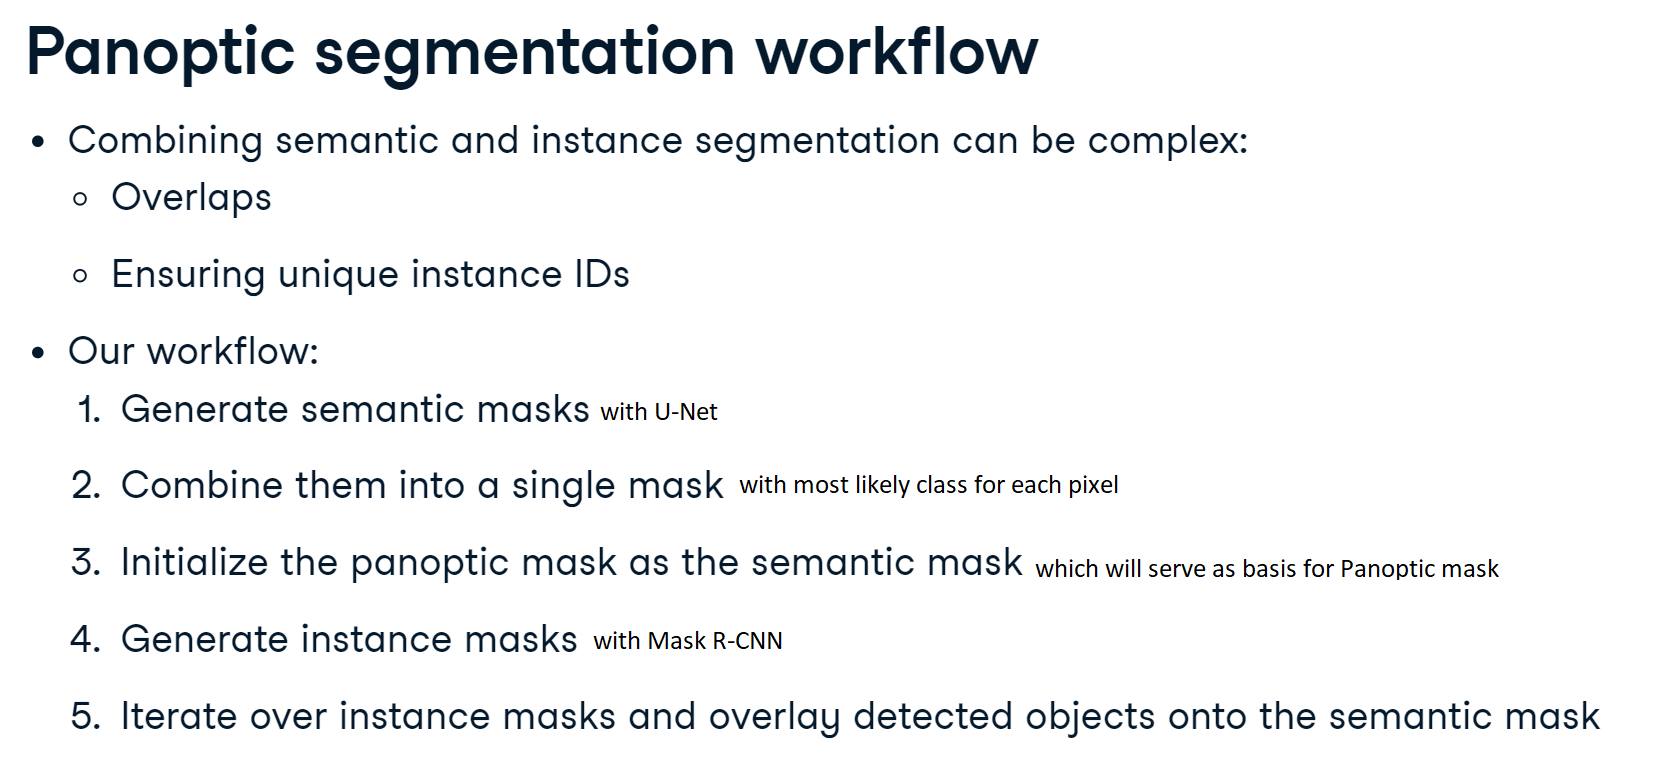

#### **Generating Semantic Masks**

loading U-Net and passing the image tensor

In [ ]:
model = UNet()

with torch.no_grad():
    semantic_masks = model(image_tensor)
    print(semantic_masks.shape)
    

Sample Output -

```
torch.Size([1, 3, 427, 640])
```

Choosing highest probability class for each pixel

In [ ]:
semantic_mask = torch.argmax(semantic_masks, dim=1)

#### **Generating Instance Masks**
loading mask-RCNN for instance segmentation

In [ ]:
model = maskRCNN()

with torch.no_grad():
    instance_masks = model(image_tensor)[0]["masks"]
    print(instance_masks.shape)

Sample Output -

```
torch.Size([80, 1, 427, 640])
```

#### **Generating Panoptic Masks**

Instantiating the **Semantic Mask** and copying its into **Panoptic Mask** tensor using `torch.clone()` function and iterating over the **Instance Masks**

In [ ]:
panoptic_mask = torch.clone(semantic_mask)

instance_id = 3     # since we have 3 classes in semantic mask (0, 1 and 2), we start instance mask ids from 3
for mask in instance_masks:
    panoptic_mask[mask > 0.5] = instance_id     # assigning id starting from 3 with 0.5 probability threshold (to filter objects with high confidence level)
    instance_id += 1